In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_sas("ds1516.sas7bdat")

In [6]:
data.head(20)

ADM_RNO      VERDATE  GEO_PRV  GEODVBHA  GEODGHR4  ALECLASS  DHH_SEX  \
0      30.0  b'20170424'     24.0    9996.0   24901.0       2.0      1.0   
1      37.0  b'20170424'     59.0    5930.0   59932.0       4.0      2.0   
2      42.0  b'20170424'     35.0    9996.0   35937.0       2.0      2.0   
3      49.0  b'20170424'     35.0    9996.0   35937.0       3.0      2.0   
4      59.0  b'20170424'     35.0    9996.0   35960.0       2.0      2.0   
5      86.0  b'20170424'     10.0    9996.0   10912.0       1.0      2.0   
6     114.0  b'20170424'     46.0    9996.0   46901.0       3.0      2.0   
7     128.0  b'20170424'     24.0    9996.0   24912.0       2.0      2.0   
8     147.0  b'20170424'     24.0    9996.0   24914.0       1.0      2.0   
9     155.0  b'20170424'     59.0    5940.0   59942.0       2.0      1.0   
10    166.0  b'20170424'     35.0    9996.0   35939.0       2.0      2.0   
11    185.0  b'20170424'     24.0    9996.0   24907.0       3.0      1.0   
12    213.0  b'20170424'     35.0    9996.0   35949.0       1.0      2.0   
13    216.0  b'20170424'     13.0    9996.0   13904.0       1.0      1.0   
14    223.0  b'20170424'     35.0    9996.0   35944.0       4.0      1.0   
15    226.0  b'20170424'     35.0    9996.0   35937.0       1.0      1.0   
16    227.0  b'20170424'     59.0    5920.0   59921.0       3.0      2.0   
17    231.0  b'20170424'     48.0    9996.0   48933.0       1.0      1.0   
18    238.0  b'20170424'     24.0    9996.0   24907.0       2.0      1.0   
19    242.0  b'20170424'     48.0    9996.0   48934.0       2.0      1.0   

    DHHGMS  DHHDG611  DHHDGL12  ...  INCG035  INCDGHH  INCDGPER  INCDVRCA  \
0      4.0       0.0       0.0  ...      6.0      1.0       2.0       1.0   
1      1.0       0.0       1.0  ...      9.0      3.0       2.0       2.0   
2      4.0       0.0       0.0  ...      6.0      3.0      96.0       3.0   
3      1.0       0.0       0.0  ...      4.0      3.0       1.0       2.0   
4      4.0       0.0       0.0  ...      6.0      5.0       6.0       9.0   
5      3.0       0.0       0.0  ...      6.0      2.0       3.0       4.0   
6      4.0       0.0       0.0  ...      6.0      3.0       4.0       6.0   
7      4.0       1.0       1.0  ...      1.0      1.0       2.0       1.0   
8      4.0       0.0       0.0  ...      1.0      5.0       2.0      10.0   
9      3.0       0.0       0.0  ...      6.0      4.0       5.0       8.0   
10     3.0       0.0       0.0  ...      6.0      5.0       6.0      10.0   
11     1.0       0.0       0.0  ...      1.0      4.0       2.0       5.0   
12     1.0       0.0       0.0  ...      1.0      5.0       5.0       9.0   
13     1.0       1.0       1.0  ...      1.0      5.0       4.0       7.0   
14     3.0       0.0       0.0  ...      6.0      1.0       2.0       1.0   
15     4.0       1.0       1.0  ...      6.0      5.0      96.0       5.0   
16     1.0       0.0       1.0  ...      1.0      4.0       2.0       4.0   
17     4.0       0.0       0.0  ...      1.0      2.0       3.0       2.0   
18     4.0       0.0       1.0  ...      1.0      3.0       4.0       2.0   
19     1.0       0.0       0.0  ...      1.0      5.0       6.0      10.0   

    INCDVRPR  INCDVRRS  ADM_040  ADM_045  ADM_050    WTS_M  
0        1.0       1.0      6.0      1.0      6.0    76.60  
1        2.0       3.0      6.0      9.0      9.0   335.46  
2        3.0       4.0      6.0      1.0      6.0   193.87  
3        2.0       2.0      6.0      1.0      6.0  1144.47  
4        9.0       8.0      6.0      1.0      6.0   399.97  
5        4.0       4.0      6.0      1.0      6.0    59.35  
6        6.0       7.0      2.0      1.0      6.0   305.06  
7        1.0       1.0      6.0      1.0      6.0   112.34  
8       10.0      10.0      6.0      1.0      6.0   208.94  
9        8.0       8.0      6.0      1.0      6.0   309.20  
10      10.0      99.0      6.0      1.0      6.0    90.08  
11       5.0       4.0      6.0      1.0      6.0  1034.5

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109659 entries, 0 to 109658
Columns: 1284 entries, ADM_RNO to WTS_M
dtypes: float64(1283), object(1)
memory usage: 1.0+ GB


In [8]:
data.dtypes

ADM_RNO     float64
VERDATE      object
GEO_PRV     float64
GEODVBHA    float64
GEODGHR4    float64
ALECLASS    float64
DHH_SEX     float64
DHHGMS      float64
DHHDG611    float64
DHHDGL12    float64
DHHDGLE5    float64
DHHDGHSZ    float64
ADM_PRX     float64
DHHDGLVG    float64
DHHGAGE     float64
DOMAC       float64
MAC_005     float64
MAC_010     float64
MAC_015     float64
MACG020     float64
EHG2DVR3    float64
EHG2DVH3    float64
DOGEN       float64
GEN_005     float64
GEN_010     float64
GEN_015     float64
GEN_020     float64
GEN_025     float64
GEN_030     float64
GENDVHDI    float64
             ...   
FSC_025     float64
FSC_030     float64
FSC_035     float64
FSC_040     float64
FSC_045     float64
FSC_050     float64
FSC_055     float64
FSC_060     float64
FSC_065     float64
FSC_070     float64
FSC_075     float64
FSC_080     float64
FSC_085     float64
FSC_090     float64
FSC_095     float64
FSCDVAFS    float64
FSCDVCFS    float64
FSCDVHFS    float64
DOADM       float64


In [6]:
sns.set(style = 'white', font_scale = 2)
corr = data.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [7]:
f, ax = plt.subplots(figsize = (200,200))
cmap = sns.diverging_palette(240, 20, as_cmap = False)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, linewidths = .5, cbar_kws = {"shrink":.3})

In [9]:
mental_health = data[[
'ADM_RNO',
'GEO_PRV',
'ALECLASS',
'DHH_SEX',
'DHHGMS',
'DHHDGLVG',
'DHHGAGE',
'MAC_005',
'MAC_010',
'MAC_015',
'GEN_005',
'GEN_015',
'GEN_020',
'GEN_025',
'GEN_030',
'GENDVHDI',
'GENDVMHI',
'GENDVSWL',
'CCC_195',
'CCC_200',
'ADL_005',
'ADL_015',
'ADL_020',
'ADL_030',
'CIH_005',
'CIH_010',
'CIH_020',
'CIH_040D',
'CIH_040E',
'SLPG005',
'SLP_010',
'FGU_010',
'SMK_005',
'SMKG040',
'DOTAL',
'NDE_005',
'ALC_005',
'ALC_015',
'DRMDVLA',
'DODRG',
'DRGDVLCA',
'PAA_035',
'PAADVWHO',
'WTM_005',
'WTMG010',
'WTM_020',
'WTM_145',
'WTM_150',
'UCN_005',
'UCN_010A',
'UCN_015A',
'UCN_015B',
'UCN_015E',
'LBFG10',
'LBFDVWSS',
'LOP_005',
'LOPG010',
'LOP_015',
'LOPG020',
'LOPG025',
'LOP_085',
'LOPG090',
'DOSMK',
'SMK_045',
'SMK_050',
'SMK_095',
'SMKG110',
'DOSCH',
'DOSCA',
'SCA_005',
'SCA_025',
'SCADVQUI',
'NDE_010',
'ETSG010',
'ETS_030',
'DOALC',
'ALC_020',
'ALCDVTTM',
'ALWDVWKY',
'ALWDVDLY',
'ALWDVLTR',
'ALWDVSTR',
'DOMED',
'DODRM',
'DOPAA',
'PAA_005',
'PAA_030',
'PAA_060',
'PAADVATR',
'PAADVREC',
'PAYDVPAG',
'DOSAC',
'SACG005',
'SACG010',
'SACG015',
'SACG020',
'SACG025',
'DOSXB',
'SXB_005',
'MEX_010',
'SUI_005',
'CMH_005'
]]

In [10]:
mental_health.to_csv('mental_health1516.csv', index = False)

In [2]:
mental_health = pd.read_csv('mental_health1516.csv')

In [3]:
np.sum(mental_health.isnull())

GEO_PRV     0
ALECLASS    0
DHH_SEX     0
DHHGMS      0
DHHDGLVG    0
DHHGAGE     0
MAC_005     0
MAC_010     0
MAC_015     0
GEN_005     0
GEN_015     0
GEN_020     0
GEN_025     0
GEN_030     0
GENDVHDI    0
GENDVMHI    0
GENDVSWL    0
CCC_195     0
CCC_200     0
ADL_005     0
ADL_015     0
ADL_020     0
ADL_030     0
CIH_005     0
CIH_010     0
CIH_020     0
CIH_040D    0
CIH_040E    0
SLPG005     0
SLP_010     0
           ..
NDE_010     0
ETSG010     0
ETS_030     0
DOALC       0
ALC_020     0
ALCDVTTM    0
ALWDVWKY    0
ALWDVDLY    0
ALWDVLTR    0
ALWDVSTR    0
DOMED       0
DODRM       0
DOPAA       0
PAA_005     0
PAA_030     0
PAA_060     0
PAADVATR    0
PAADVREC    0
PAYDVPAG    0
DOSAC       0
SACG005     0
SACG010     0
SACG015     0
SACG020     0
SACG025     0
DOSXB       0
SXB_005     0
MEX_010     0
SUI_005     0
CMH_005     0
Length: 101, dtype: int64

In [91]:
mental_health.head()

GEO_PRV  ALECLASS  DHH_SEX  DHHGMS  DHHDGLVG  DHHGAGE  MAC_005  MAC_010  \
0       24         2        1       4         1       12        9        2   
1       59         4        2       1         4        8        1        1   
2       35         2        2       4         6        2       99        1   
3       35         3        2       1         8       11       11        2   
4       35         2        2       4         1        9        3        1   

   MAC_015  GEN_005  ...  SACG005  SACG010  SACG015  SACG020  SACG025  DOSXB  \
0        2        3  ...       96       96        6       96       96      1   
1        2        2  ...        2        1        1        1        1      1   
2        2        2  ...        4        3        1        1        3      1   
3        2        4  ...        1        7        1        1        3      1   
4        2        1  ...        5        1        1        4        5      1   

   SXB_005  MEX_010  SUI_005  CMH_005  
0        8        6        2        2  
1        1        1        1        2  
2        2        6        2        2  
3        1        6        2        2  
4        1        2        1        2  

[5 rows x 101 columns]

In [4]:
sns.set(style = 'white', font_scale = 10)
corr = mental_health.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [5]:
f, ax = plt.subplots(figsize = (200,200))
cmap = sns.diverging_palette(240, 20, as_cmap = False)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, linewidths = .5, cbar_kws = {"shrink":.3})

## Prediction of Mental Health Consultation

In [3]:
mental_health.CMH_005.unique()

array([2, 1, 7, 9, 8], dtype=int64)

In [4]:
Health_Conslt = [2., 1.]
mental_health_conslt = mental_health[mental_health.CMH_005.isin(Health_Conslt)]

In [5]:
X_c = mental_health_conslt[[
'GEO_PRV',
'ALECLASS',
'DHH_SEX',
'DHHGMS',
'DHHDGLVG',
'DHHGAGE',
'MAC_005',
'MAC_010',
'MAC_015',
'GEN_005',
'GEN_015',
'GEN_020',
'GEN_025',
'GEN_030',
'GENDVHDI',
'GENDVMHI',
'GENDVSWL',
'CCC_195',
'CCC_200',
'ADL_005',
'ADL_015',
'ADL_020',
'ADL_030',
'CIH_005',
'CIH_010',
'CIH_020',
'CIH_040D',
'CIH_040E',
'SLPG005',
'SLP_010',
'FGU_010',
'SMK_005',
'SMKG040',
'DOTAL',
'NDE_005',
'ALC_005',
'ALC_015',
'DRMDVLA',
'DODRG',
'DRGDVLCA',
'PAA_035',
'PAADVWHO',
'WTM_005',
'WTMG010',
'WTM_020',
'WTM_145',
'WTM_150',
'UCN_005',
'UCN_010A',
'UCN_015A',
'UCN_015B',
'UCN_015E',
'LBFG10',
'LBFDVWSS',
'LOP_005',
'LOPG010',
'LOP_015',
'LOPG020',
'LOPG025',
'LOP_085',
'LOPG090',
'DOSMK',
'SMK_045',
'SMK_050',
'SMK_095',
'SMKG110',
'DOSCH',
'DOSCA',
'SCA_005',
'SCA_025',
'SCADVQUI',
'NDE_010',
'ETSG010',
'ETS_030',
'DOALC',
'ALC_020',
'ALCDVTTM',
'ALWDVWKY',
'ALWDVDLY',
'ALWDVLTR',
'ALWDVSTR',
'DOMED',
'DODRM',
'DOPAA',
'PAA_005',
'PAA_030',
'PAA_060',
'PAADVATR',
'PAADVREC',
'PAYDVPAG',
'DOSAC',
'SACG005',
'SACG010',
'SACG015',
'SACG020',
'SACG025',
'DOSXB',
'SXB_005',
'MEX_010'
]]

y_c = mental_health_conslt[['CMH_005']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, random_state=0, test_size=0.75, stratify=y_c)

## KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier  

n_neighbors = [1, 3, 5, 7, 9]
acc_train = []
acc_test = []

for n in n_neighbors:
    print("Building model for k = ", n)
    clf_c = KNeighborsClassifier(n_neighbors=n)
    clf_c.fit(X_train, y_train)  
    acc_train.append(clf_c.score(X_train, y_train))
    acc_test.append(clf_c.score(X_test, y_test))
    
print("Train Accuracies: ", acc_train)
print("Test Accuracies: ", acc_test)

Building model for k =  1
Building model for k =  3
Building model for k =  5
Building model for k =  7
Building model for k =  9
Train Accuracies:  [0.9999624624624625, 0.8847597597597597, 0.8668918918918919, 0.8599474474474474, 0.8571696696696697]
Test Accuracies:  [0.7745580120866333, 0.8237053163670033, 0.840433917645734, 0.8475657820652378, 0.8502183351475795]


## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_c = DecisionTreeClassifier(random_state=0)
tree_c.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree_c.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_c.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.811


In [15]:
def plot_feature_importances(model):
    n_features = X_c.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_c.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

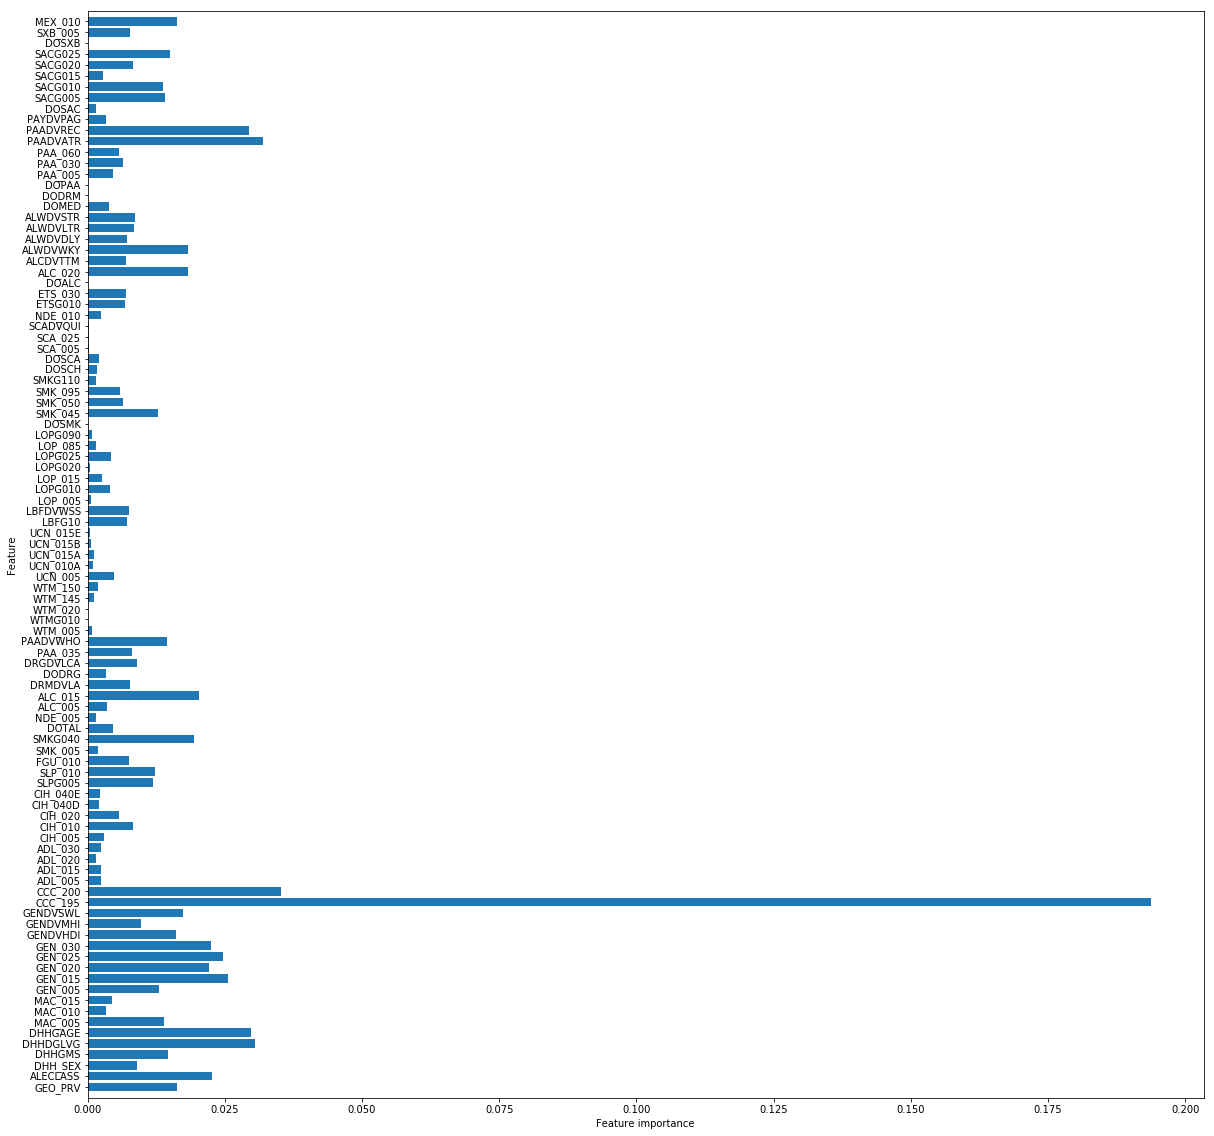

In [16]:
plot_feature_importances(tree_c)

## Random forests

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_c = RandomForestClassifier(n_estimators=100, random_state=0)
forest_c.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_c.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_c.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.882


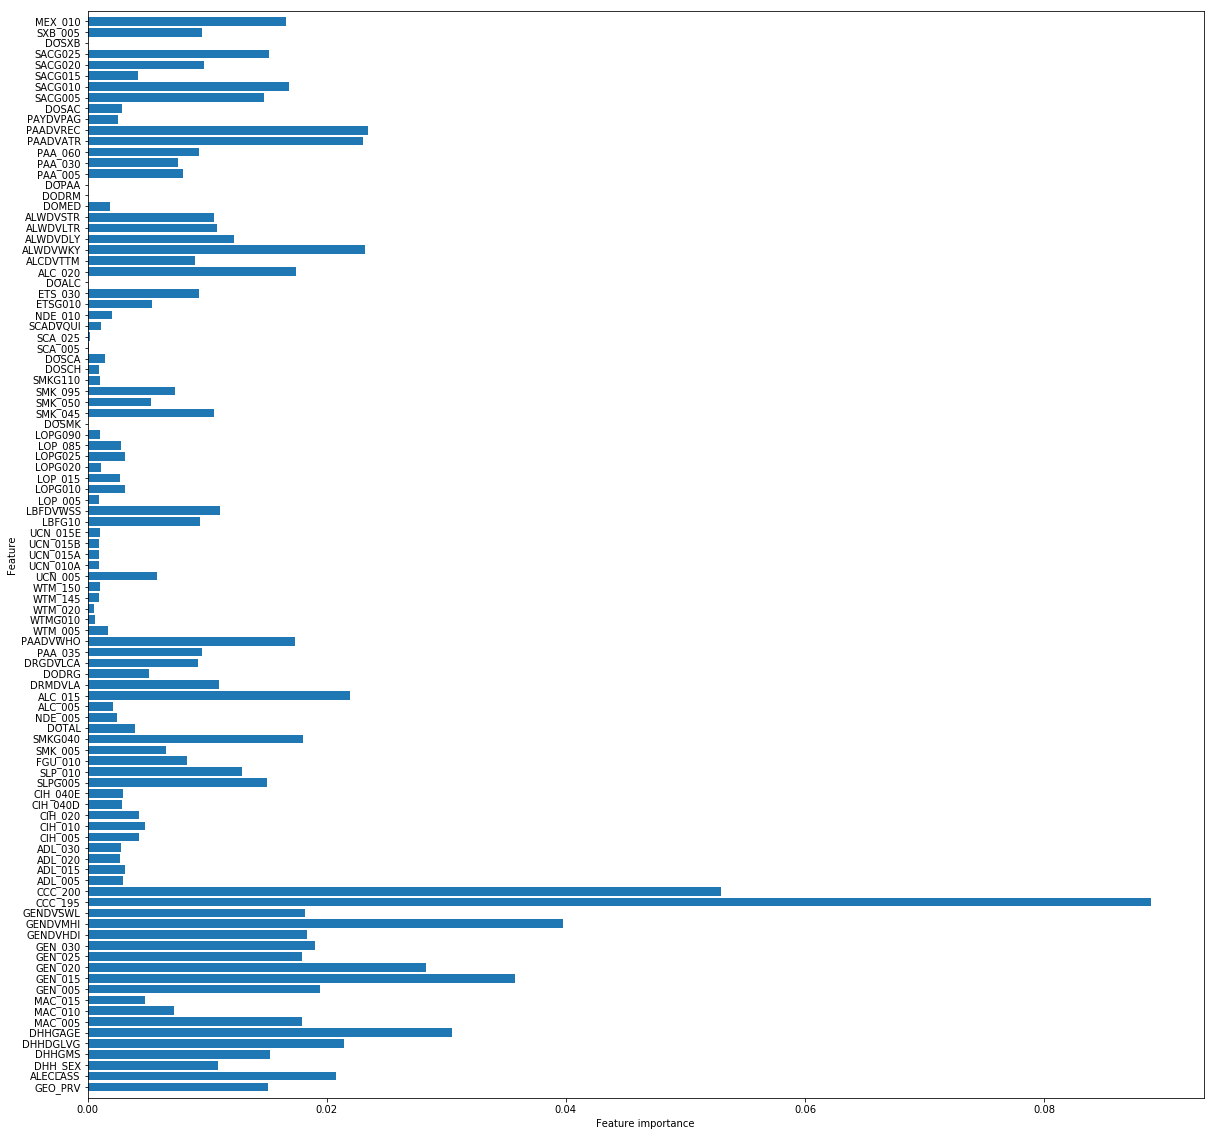

In [18]:
plot_feature_importances(forest_c)

## Gradient Boosting Machines

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_c = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gb_c.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb_c.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb_c.score(X_test, y_test)))

Accuracy on training set: 0.873
Accuracy on test set: 0.872


In [9]:
pred_GB_C = gb_c.predict(X_test)

Confusion matrix - Gradient Boosting:


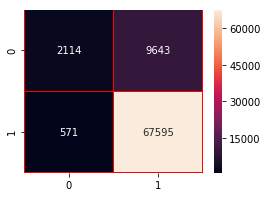

In [12]:
confusion_GB_C = confusion_matrix(y_test, pred_GB_C)
print("Confusion matrix - Gradient Boosting:")
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_GB_C,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

In [15]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred_GB_C, average='macro')

(0.831244592459699, 0.5857155820259171, 0.6112557877364669, None)

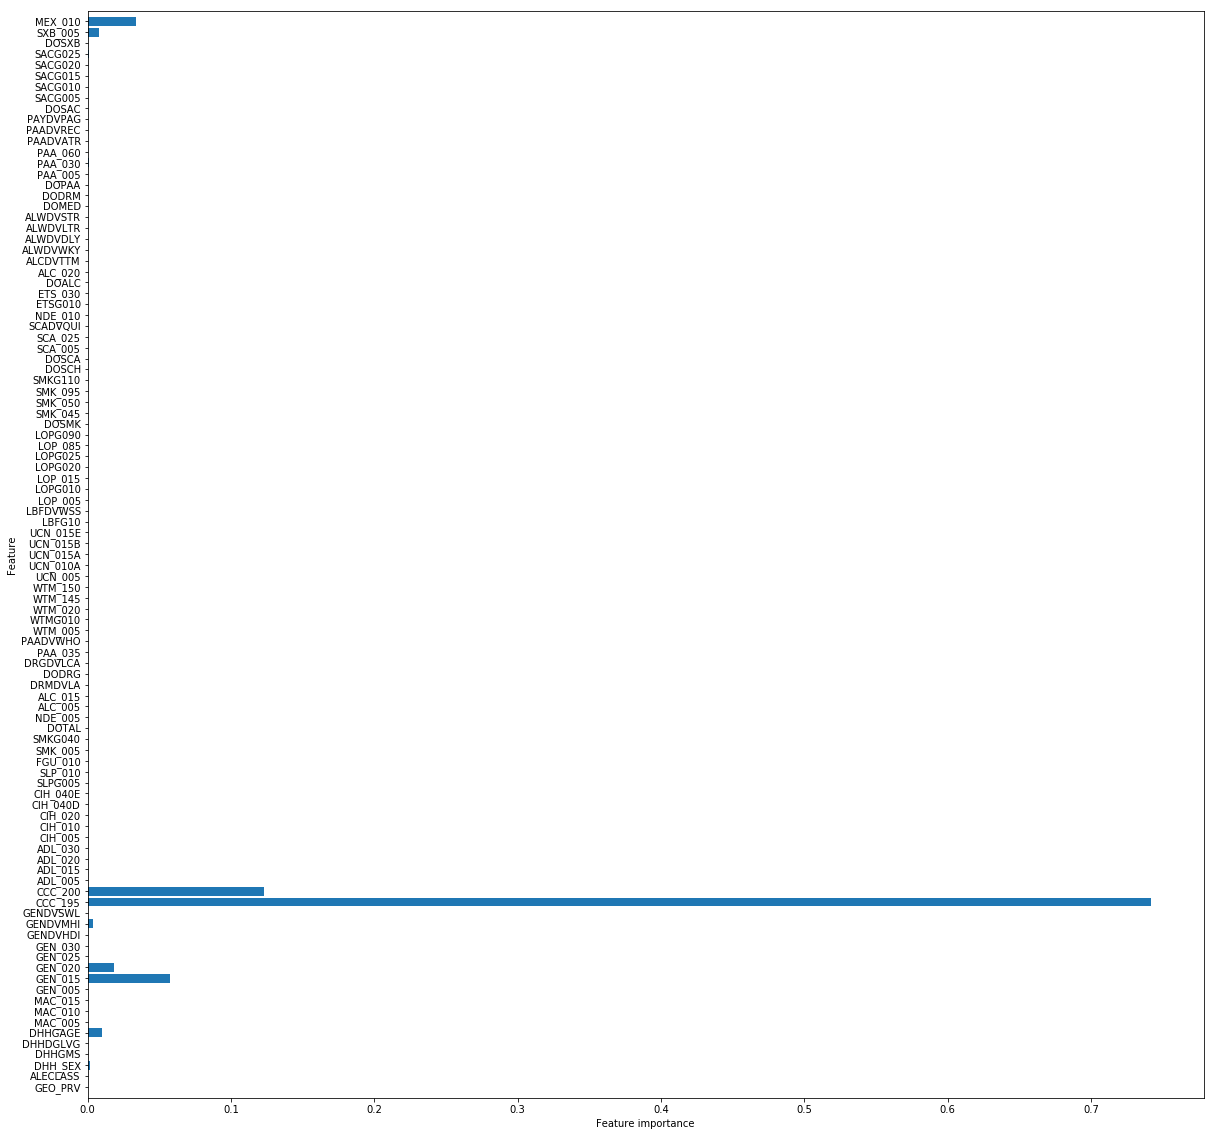

In [20]:
plot_feature_importances(gb_c)

## Neural Networks

In [16]:
from sklearn.neural_network import MLPClassifier

mlp_c = MLPClassifier(max_iter=1000, random_state=0)
mlp_c.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp_c.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp_c.score(X_test, y_test)))

Accuracy on training set: 0.88
Accuracy on test set: 0.87


In [17]:
pred_mlp_C = mlp_c.predict(X_test)

Confusion matrix - MLP:


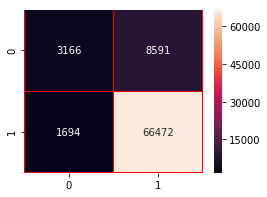

In [18]:
confusion_mlp_C = confusion_matrix(y_test, pred_mlp_C)
print("Confusion matrix - MLP:")
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_mlp_C,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

In [19]:
precision_recall_fscore_support(y_test, pred_mlp_C, average='macro')

(0.7684949004975739, 0.622217641896169, 0.6546237309835846, None)

## Prediction of Suicide

In [28]:
mental_health.SUI_005.unique()

array([2, 1, 6, 9, 8, 7], dtype=int64)

In [29]:
Suicide_Values= [2., 1.]
mental_health_sui = mental_health[mental_health.SUI_005.isin(Suicide_Values)]

In [30]:
X_s = mental_health_sui[[
'GEO_PRV',
'ALECLASS',
'DHH_SEX',
'DHHGMS',
'DHHDGLVG',
'DHHGAGE',
'MAC_005',
'MAC_010',
'MAC_015',
'GEN_005',
'GEN_015',
'GEN_020',
'GEN_025',
'GEN_030',
'GENDVHDI',
'GENDVMHI',
'GENDVSWL',
'CCC_195',
'CCC_200',
'ADL_005',
'ADL_015',
'ADL_020',
'ADL_030',
'CIH_005',
'CIH_010',
'CIH_020',
'CIH_040D',
'CIH_040E',
'SLPG005',
'SLP_010',
'FGU_010',
'SMK_005',
'SMKG040',
'DOTAL',
'NDE_005',
'ALC_005',
'ALC_015',
'DRMDVLA',
'DODRG',
'DRGDVLCA',
'PAA_035',
'PAADVWHO',
'WTM_005',
'WTMG010',
'WTM_020',
'WTM_145',
'WTM_150',
'UCN_005',
'UCN_010A',
'UCN_015A',
'UCN_015B',
'UCN_015E',
'LBFG10',
'LBFDVWSS',
'LOP_005',
'LOPG010',
'LOP_015',
'LOPG020',
'LOPG025',
'LOP_085',
'LOPG090',
'DOSMK',
'SMK_045',
'SMK_050',
'SMK_095',
'SMKG110',
'DOSCH',
'DOSCA',
'SCA_005',
'SCA_025',
'SCADVQUI',
'NDE_010',
'ETSG010',
'ETS_030',
'DOALC',
'ALC_020',
'ALCDVTTM',
'ALWDVWKY',
'ALWDVDLY',
'ALWDVLTR',
'ALWDVSTR',
'DOMED',
'DODRM',
'DOPAA',
'PAA_005',
'PAA_030',
'PAA_060',
'PAADVATR',
'PAADVREC',
'PAYDVPAG',
'DOSAC',
'SACG005',
'SACG010',
'SACG015',
'SACG020',
'SACG025',
'DOSXB',
'SXB_005',
'MEX_010'
]]

y_s = mental_health_sui[['SUI_005']]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, random_state=0, test_size=0.75, stratify=y_s)

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier  

n_neighbors = [1, 3, 5, 7, 9]
acc_train = []
acc_test = []

for n in n_neighbors:
    print("Building model for k = ", n)
    clf_s = KNeighborsClassifier(n_neighbors=n)
    clf_s.fit(X_train, y_train)  
    acc_train.append(clf_s.score(X_train, y_train))
    acc_test.append(clf_s.score(X_test, y_test))
    
print("Train Accuracies: ", acc_train)
print("Test Accuracies: ", acc_test)

Building model for k =  1
Building model for k =  3
Building model for k =  5
Building model for k =  7
Building model for k =  9
Train Accuracies:  [1.0, 0.8942556697794868, 0.8767558659656282, 0.8725182453111512, 0.8705171466687593]
Test Accuracies:  [0.7939576249019095, 0.8391577295317814, 0.852968872613131, 0.8585404132879937, 0.8620062777923096]


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_s = DecisionTreeClassifier(random_state=0)
tree_s.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree_s.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_s.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.801


In [28]:
def plot_feature_importances(model):
    n_features = X_s.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_s.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

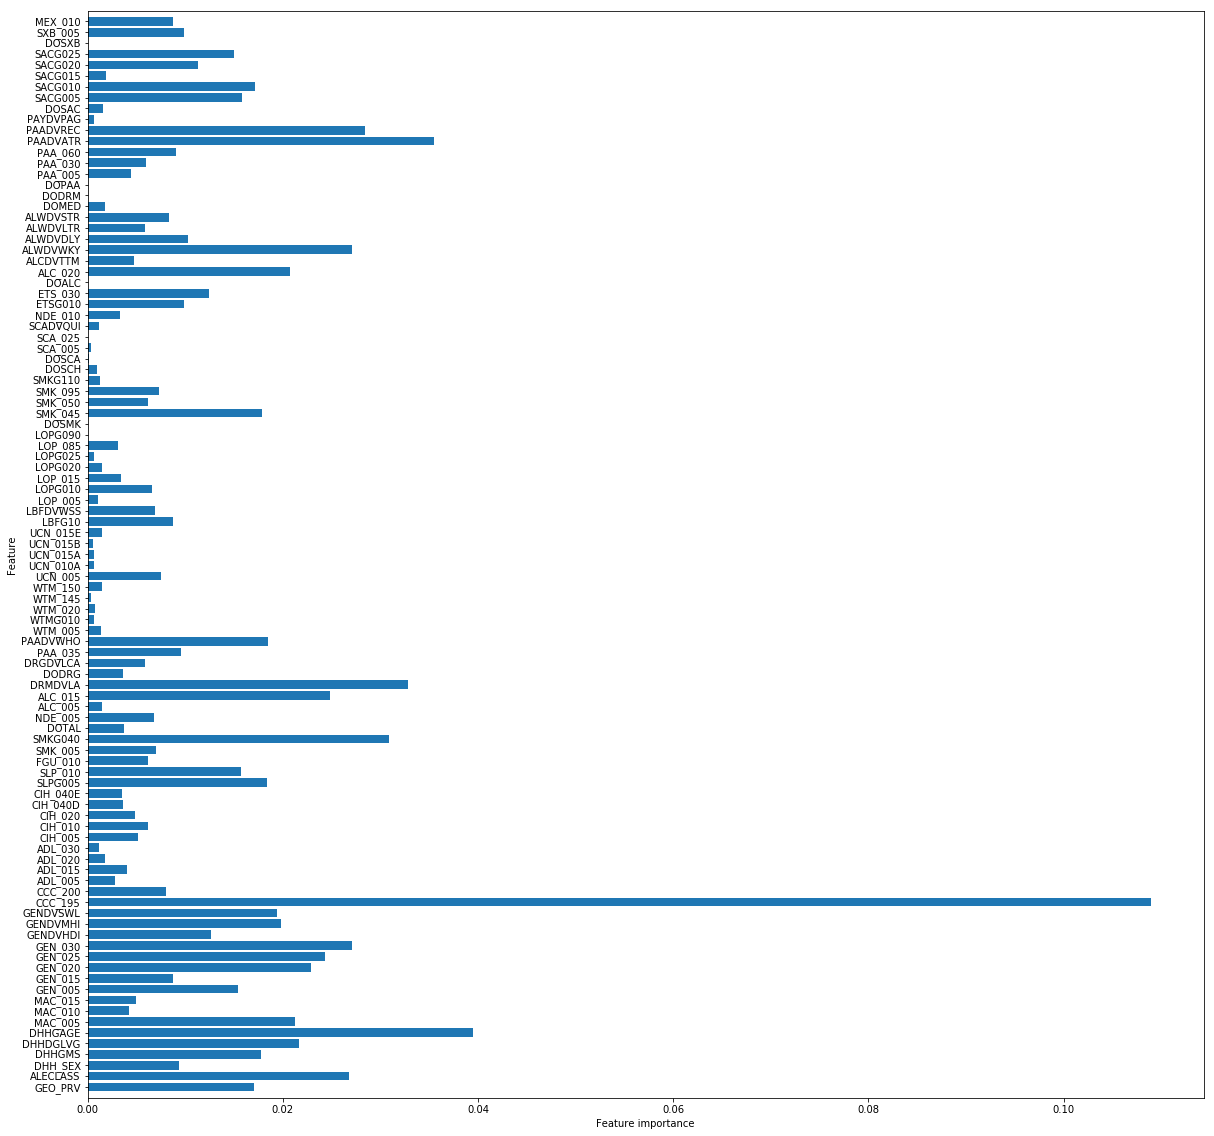

In [29]:
plot_feature_importances(tree_s)

## Random forests

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_s = RandomForestClassifier(n_estimators=100, random_state=0)
forest_s.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_s.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_s.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.876


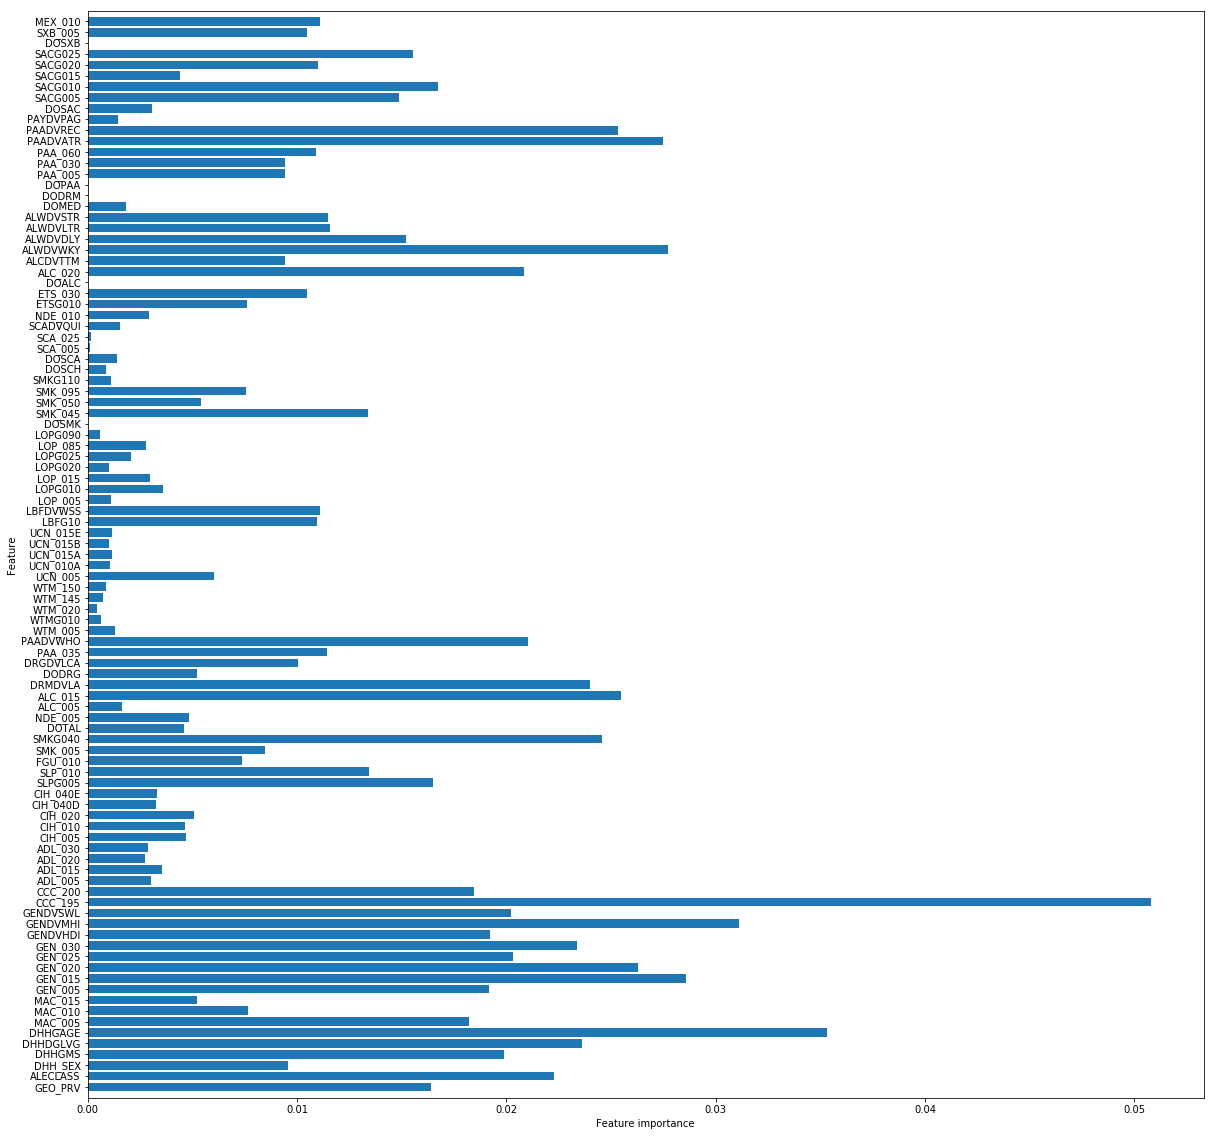

In [31]:
plot_feature_importances(forest_s)

## Gradient Boosting Machines

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_s = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gb_s.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb_s.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb_s.score(X_test, y_test)))

Accuracy on training set: 0.867
Accuracy on test set: 0.867


In [33]:
pred_GB_S = gb_s.predict(X_test)

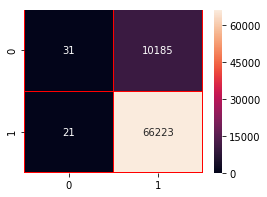

In [34]:
confusion_GB_S = confusion_matrix(y_test, pred_GB_S)
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_GB_S,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

In [35]:
precision_recall_fscore_support(y_test, pred_GB_S, average='macro')

(0.7314281428444867, 0.5013587229566383, 0.46724671930801476, None)

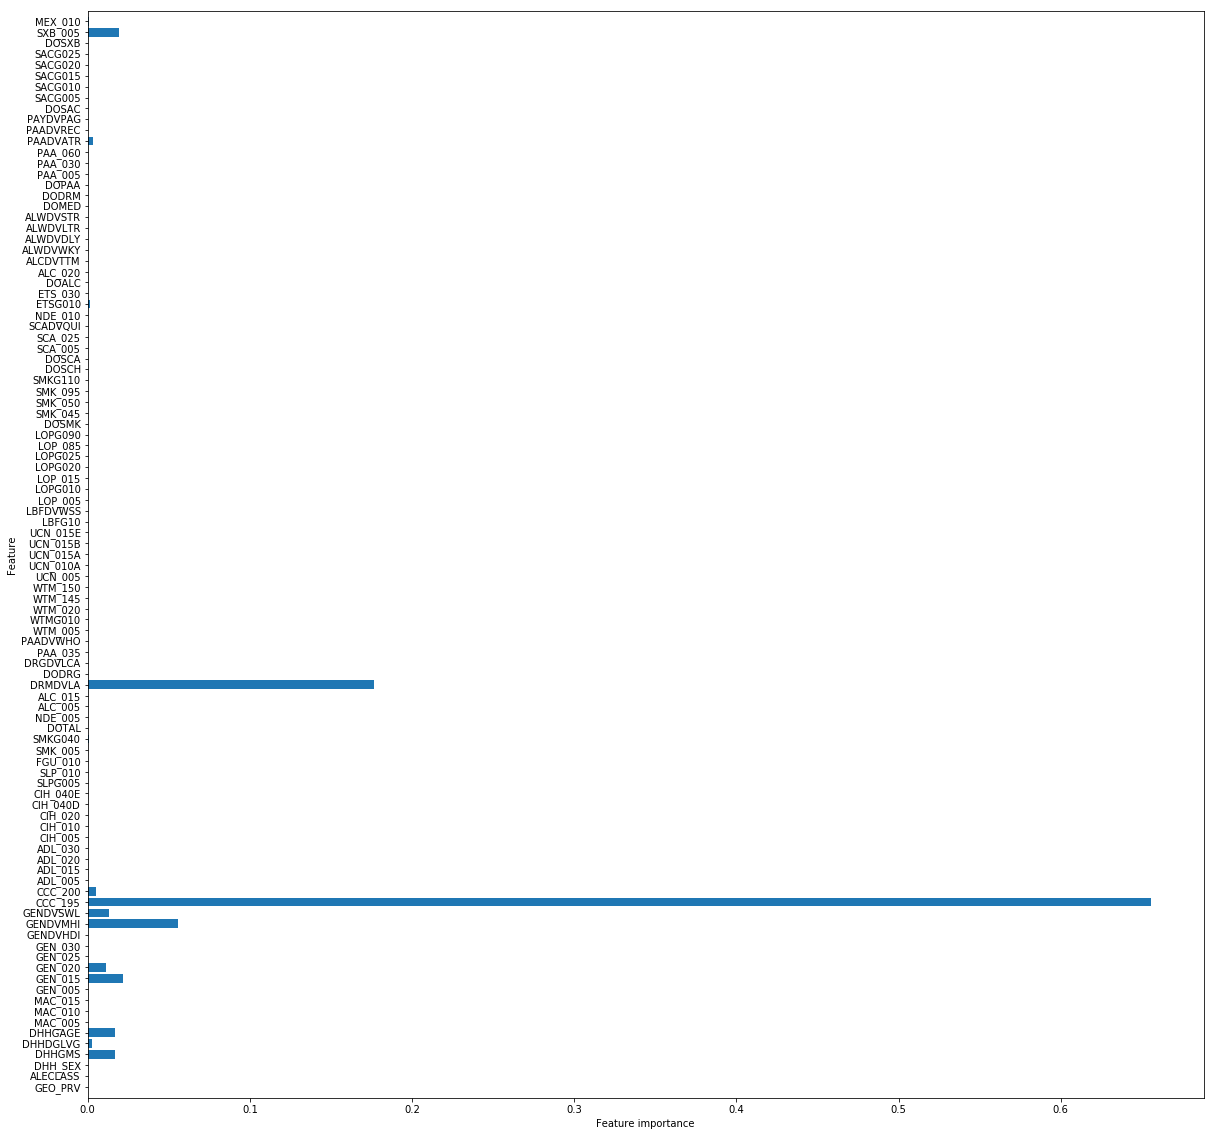

In [33]:
plot_feature_importances(gb_s)

## Neural Networks

In [36]:
from sklearn.neural_network import MLPClassifier

mlp_s = MLPClassifier(max_iter=1000, random_state=0)
mlp_s.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp_s.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp_s.score(X_test, y_test)))

Accuracy on training set: 0.88
Accuracy on test set: 0.87


In [37]:
pred_mlp_S = mlp_s.predict(X_test)

Confusion matrix - MLP:


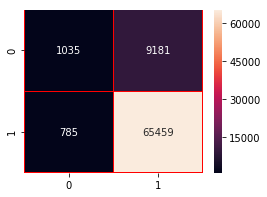

In [38]:
confusion_mlp_S = confusion_matrix(y_test, pred_mlp_S)
print("Confusion matrix - MLP:")
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_mlp_S,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

In [39]:
precision_recall_fscore_support(y_test, pred_mlp_S, average='macro')

(0.7228387836707773, 0.5447307690743654, 0.5506225000646112, None)

In [48]:
test = pd.read_csv('test.csv')

In [49]:
test = test[[
'GEO_PRV',
'ALECLASS',
'DHH_SEX',
'DHHGMS',
'DHHDGLVG',
'DHHGAGE',
'MAC_005',
'MAC_010',
'MAC_015',
'GEN_005',
'GEN_015',
'GEN_020',
'GEN_025',
'GEN_030',
'GENDVHDI',
'GENDVMHI',
'GENDVSWL',
'CCC_195',
'CCC_200',
'ADL_005',
'ADL_015',
'ADL_020',
'ADL_030',
'CIH_005',
'CIH_010',
'CIH_020',
'CIH_040D',
'CIH_040E',
'SLPG005',
'SLP_010',
'FGU_010',
'SMK_005',
'SMKG040',
'DOTAL',
'NDE_005',
'ALC_005',
'ALC_015',
'DRMDVLA',
'DODRG',
'DRGDVLCA',
'PAA_035',
'PAADVWHO',
'WTM_005',
'WTMG010',
'WTM_020',
'WTM_145',
'WTM_150',
'UCN_005',
'UCN_010A',
'UCN_015A',
'UCN_015B',
'UCN_015E',
'LBFG10',
'LBFDVWSS',
'LOP_005',
'LOPG010',
'LOP_015',
'LOPG020',
'LOPG025',
'LOP_085',
'LOPG090',
'DOSMK',
'SMK_045',
'SMK_050',
'SMK_095',
'SMKG110',
'DOSCH',
'DOSCA',
'SCA_005',
'SCA_025',
'SCADVQUI',
'NDE_010',
'ETSG010',
'ETS_030',
'DOALC',
'ALC_020',
'ALCDVTTM',
'ALWDVWKY',
'ALWDVDLY',
'ALWDVLTR',
'ALWDVSTR',
'DOMED',
'DODRM',
'DOPAA',
'PAA_005',
'PAA_030',
'PAA_060',
'PAADVATR',
'PAADVREC',
'PAYDVPAG',
'DOSAC',
'SACG005',
'SACG010',
'SACG015',
'SACG020',
'SACG025',
'DOSXB',
'SXB_005',
'MEX_010'
]]

In [50]:
c = gb_c.predict(test)

In [51]:
s = gb_s.predict(test)

In [52]:
df = pd.DataFrame({'CMH_005': c,
                  'SUI_005': s})

In [53]:
df.to_csv('test_result.csv', index=False)

In [54]:
df

CMH_005  SUI_005
0        2        2